In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()

# 1. Guassian NB
Assumption:

- Each data for a label comes from the respective guassian distribution (normal distribution) of that label.
- Means data for each labels are independent of each other.
- i.e. Features are independent of each other.
- Data is continuous and has mean and SD which is used internally in model generation.

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
X[:10]

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691]])

In [11]:
y[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

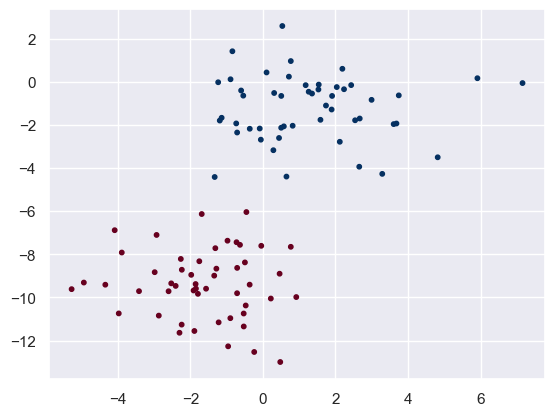

In [30]:
plt.scatter(X[:, 0], [X[:, 1]], s=10, cmap='RdBu', c=y)   # Color classifocation based on y value

In [17]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [18]:
model.fit(X, y)

GaussianNB()

In [23]:
# Generate new data and predict label

np.random.seed(0)
Xnew = [-6, -14] + [14, 18] * np.random.rand(2000, 2)

In [26]:
Xnew

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       ...,
       [-4.32134532, -7.70649139],
       [ 0.08823081,  0.94005305],
       [ 7.05928655, -8.44990818]])

In [27]:
ynew = model.predict(Xnew)

In [28]:
ynew

array([1, 1, 1, ..., 0, 1, 1])

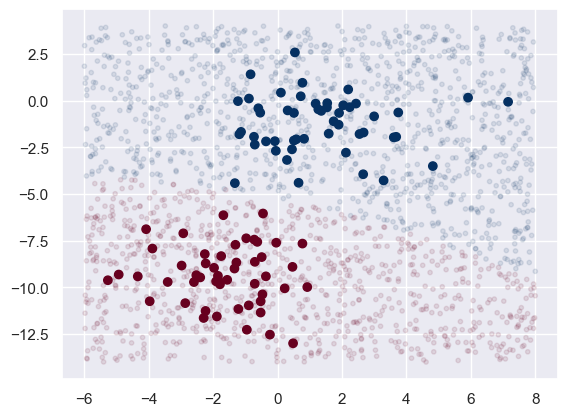

In [38]:
plt.scatter(Xnew[:,0], Xnew[:, 1], c=ynew, cmap='RdBu', s = 10, alpha=0.1)
plt.scatter(X[:,0], X[:, 1], cmap='RdBu', c=y)

- A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method

In [47]:
yprob = model.predict_proba(Xnew)  # NB model method to see probability of point to be of class 0 and 1

In [49]:
yprob[-20:].round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

- The columns give the posterior probabilities of the first and second label, respectively.

# 2. Multinomial NB

- Data is discrete and repeated not continous like in GNB
- Therefore, parameters used for model generation are number of trials and probabilities of outcome.
- e.g. when we toss a coin 10 times, outcome is either head or tail. Say, we want to predict the number of heads in 10 tosses?
  

## Example: Text classification

In [55]:
from sklearn.datasets import fetch_20newsgroups

In [57]:
data = fetch_20newsgroups(subset='train')

In [59]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [61]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)

In [62]:
test = fetch_20newsgroups(subset='test', categories=categories)

In [69]:
train.data[:5]

["From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christian trait\nOrganization: Motorola LPA Development\nLines: 26\n\nIn article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com\n(jcj) wrote:\n\n> I'd like to remind people of the withering of the fig tree and Jesus\n> driving the money changers et. al. out of the temple.  I think those\n> were two instances of Christ showing anger (as part of His human side).\n> \nYes, and what about Paul saying:\n\n26 Be ye angry, and sin not: let not the sun go down upon your wrath:\n(Ephesians 4:26).\n\nObviously then, we can be angry w/o sinning.\n\nJon\n\n------------------------------------------------\nJon Ogden         - jono@mac-ak-24.rtsg.mot.com\nMotorola Cellular - Advanced Products Division\nVoice: 708-632-2521      Data: 708-632-6086\n------------------------------------------------\n\nThey drew a circle and shut him out.\nHeretic, Rebel, a thing to flout.\nBut Love and I had the wi

- In order to use this data for machine learning, we need to be able to convert the content
of each string into a vector of numbers. For this we will use the TF–IDF vectorizer and create a pipeline that
attaches it to a multinomial naive Bayes classifier:

In [78]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [72]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [73]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [74]:
labels = model.predict(test.data)

In [84]:
labels  # Predicted test data output

array([2, 0, 1, ..., 1, 2, 1])

In [83]:
test.target  # Real values of test data output

1432

- Now that we have predicted the labels for the test data, we can evaluate them to learn
about the performance of the estimator. 
- For example, here is the confusion matrix
between the true and predicted labels for the test data:

In [80]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

In [85]:
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]])

Text(110.44999999999996, 0.5, 'predicted label')

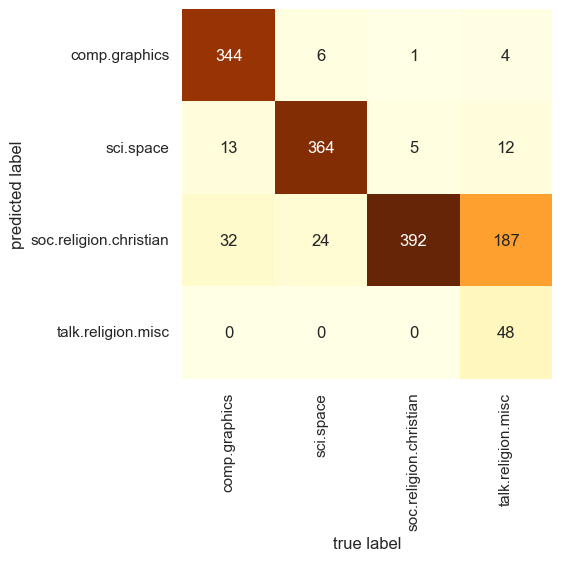

In [99]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap='YlOrBr')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [101]:
# Predict text category

def predict_category(s, train=train, model= model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [102]:
predict_category('sending a payload to the ISS')

'sci.space'

In [103]:
predict_category('determining the screen resolution')

'comp.graphics'

In [105]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'